# HandTalk

- Putri Andriyani		     211401008
- Rani Widya Astuti		     211401018
- Angela Siadari			     211401030
- Tessa Agitha Irwani Br Barus	     211401138

# Download Dataset

In [ ]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 12.8 MB/s eta 0:00:00


In [ ]:
# install kaggle package
!pip install -q kaggle

In [ ]:
# upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tessaagitha","key":"271237fbe69bbfd77c087fbb35d7f9e0"}'}

In [ ]:
# check dataset list
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                        title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
bhadramohit/customer-shopping-latest-trends-dataset        Customer Shopping (Latest Trends) Dataset           76KB  2024-11-23 15:26:12           7775        143  1.0              
malaiarasugraj/global-health-statistics                    Global Health Statistics                            44MB  2024-11-27 10:52:27           1976         27  1.0              
mujtabamatin/air-quality-and-pollution-assessment          Air Quality and Pollution Assessment                84KB  2024-12-04 15:29:51           2315         43  1.0              
hopesb/student-depression-dataset                          Student Depression Dataset.    

In [ ]:
# download dataset
!kaggle datasets download -d tessaagitha/bisindo-by-elcue

Dataset URL: https://www.kaggle.com/datasets/tessaagitha/bisindo-by-elcue
License(s): unknown
 98% 257M/261M [00:02<00:00, 113MB/s]
100% 261M/261M [00:02<00:00, 102MB/s]


In [ ]:
# unzip dataset
!mkdir bisindo-by-elcue
!unzip bisindo-by-elcue.zip -d bisindo-by-elcue
!ls bisindo-by-elcue

Streaming output truncated to the last 5000 lines.
  inflating: bisindo-by-elcue/dataset_isyarat/D/D_Putri_62.jpg  
  inflating: bisindo-by-elcue/dataset_isyarat/D/D_Putri_63.jpg  
  inflating: bisindo-by-elcue/dataset_isyarat/D/D_Putri_64.jpg  
  inflating: bisindo-by-elcue/dataset_isyarat/D/D_Putri_65.jpg  
  inflating: bisindo-by-elcue/dataset_isyarat/D/D_Putri_66.jpg  
  inflating: bisindo-by-elcue/dataset_isyarat/D/D_Putri_67.jpg  
  inflating: bisindo-by-elcue/dataset_isyarat/D/D_Putri_68.jpg  
  inflating: bisindo-by-elcue/dataset_isyarat/D/D_Putri_69.jpg  
  inflating: bisindo-by-elcue/dataset_isyarat/D/D_Putri_7.jpg  
  inflating: bisindo-by-elcue/dataset_isyarat/D/D_Putri_70.jpg  
  inflating: bisindo-by-elcue/dataset_isyarat/D/D_Putri_71.jpg  
  inflating: bisindo-by-elcue/dataset_isyarat/D/D_Putri_72.jpg  
  inflating: bisindo-by-elcue/dataset_isyarat/D/D_Putri_73.jpg  
  inflating: bisindo-by-elcue/dataset_isyarat/D/D_Putri_74.jpg  
  inflating: bisindo-by-elcue/dataset_is

# Load Dataset

In [ ]:
import os
import shutil
import cv2 # Import the OpenCV library
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import visualkeras
import tensorflow.keras as keras
import sklearn.metrics as metrics
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import img_to_array # Import img_to_array from keras.preprocessing.image or tensorflow.keras.utils
from tensorflow.keras.utils import to_categorical # Import to_categorical if not already imported
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam


In [ ]:
data_folder = '/content/bisindo-by-elcue/dataset_isyarat'

In [ ]:
def load_images():
    images = []
    labels = []
    index = -1
    folders = sorted(os.listdir(data_folder))

    for folder in folders:
        index += 1

        print("Loading images from folder ", folder ," has started.")
        for image in os.listdir(data_folder + '/' + folder):
            img = cv2.imread(data_folder + '/' + folder + '/' + image, 0)


            img = edge_detection(img)
            img = cv2.resize(img, (64, 64))
            img = img_to_array(img)
            images.append(img)
            labels.append(index)

    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = to_categorical(labels)

    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

    return x_train, x_test, y_train, y_test

# Pre-processing

In [ ]:
def edge_detection(image):
    minValue = 70
    blur = cv2.GaussianBlur(image,(5,5),2)
    th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    return res

In [ ]:
x_train, x_test, y_train, y_test = load_images()

Loading images from folder  A  has started.
Loading images from folder  Asal  has started.
Loading images from folder  B  has started.
Loading images from folder  C  has started.
Loading images from folder  D  has started.
Loading images from folder  E  has started.
Loading images from folder  Halo  has started.
Loading images from folder  I  has started.
Loading images from folder  Terima kasih  has started.


In [ ]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train, random_state=17)
x_test, y_test = shuffle(x_test, y_test, random_state=17)

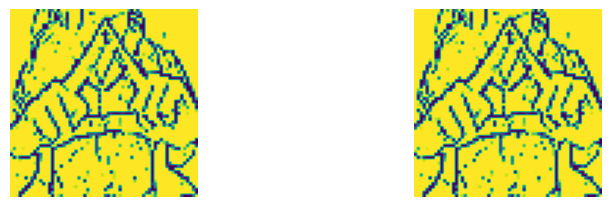

In [ ]:
alpha = [chr(c) for c in range(65,91)]
un,count = np.unique(y_train,return_counts=True)
j=1
plt.figure(figsize=(20,20))
for i in un:
    plt.subplot(7,4,j)
    plt.imshow(x_train[np.where(y_train == np.array(i))[0][0]])
    plt.axis('off')
    j=j+1

# Training

In [ ]:
map_characters = {0: 'A', 1: 'Asal', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'Halo', 7: 'I', 8: 'Terima kasih'}

In [ ]:
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',padding="same", input_shape=(64, 64, 1)),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3),padding="same", activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3),padding="same", activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3),padding="same", activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(9, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,033 (879.04 KB)

 Trainable params: 225,033 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


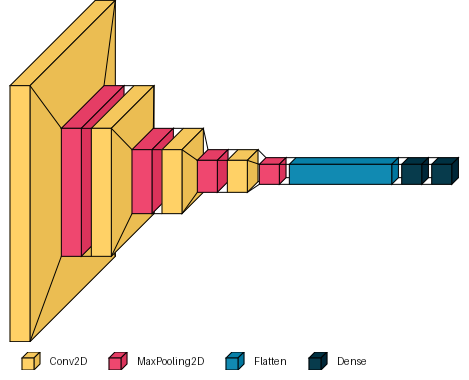

In [ ]:
visualkeras.layered_view(model,legend=True)

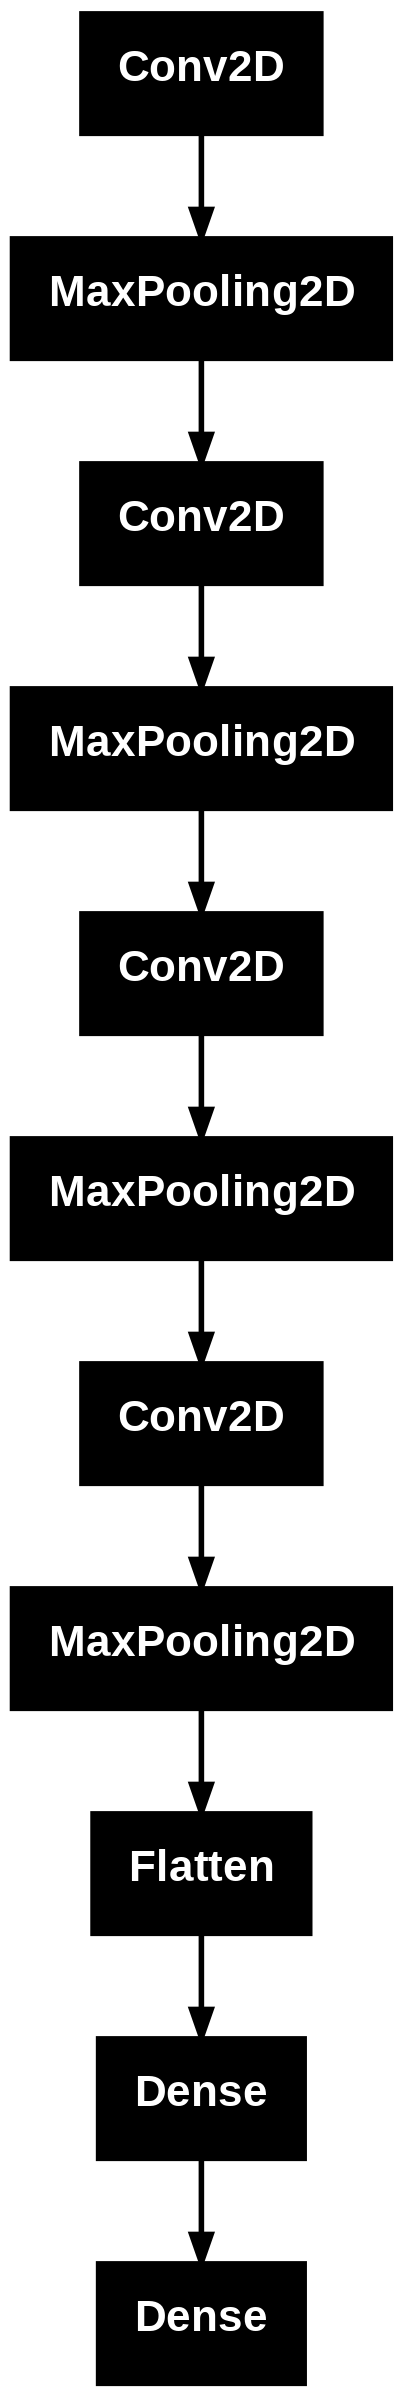

In [ ]:
keras.utils.plot_model(model)

In [ ]:
gpu_options = tf.compat.v1.GPUOptions(allow_growth=True)
session = tf.compat.v1.InteractiveSession(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

In [ ]:
#Defining callback for preventing underfitting and overfitting
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and (logs.get('accuracy') > 0.97):
            print("\nCancelling training")
            self.model.stop_training = True

In [ ]:
classes = 9
epochs = 50

callback = myCallback()

adam = Adam(learning_rate=0.00001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(x_test, y_test), shuffle=True, callbacks=[callback])

Epoch 1/50
238/238 - 58s - 243ms/step - accuracy: 0.1262 - loss: 2.1961 - val_accuracy: 0.2018 - val_loss: 2.1885
Epoch 2/50
238/238 - 57s - 239ms/step - accuracy: 0.2225 - loss: 2.1834 - val_accuracy: 0.2429 - val_loss: 2.1782
Epoch 3/50
238/238 - 79s - 331ms/step - accuracy: 0.2627 - loss: 2.1685 - val_accuracy: 0.2555 - val_loss: 2.1598
Epoch 4/50
238/238 - 86s - 362ms/step - accuracy: 0.3058 - loss: 2.1414 - val_accuracy: 0.2919 - val_loss: 2.1263
Epoch 5/50
238/238 - 55s - 229ms/step - accuracy: 0.3149 - loss: 2.0981 - val_accuracy: 0.3467 - val_loss: 2.0709
Epoch 6/50
238/238 - 83s - 347ms/step - accuracy: 0.3436 - loss: 2.0333 - val_accuracy: 0.3736 - val_loss: 1.9997
Epoch 7/50
238/238 - 81s - 342ms/step - accuracy: 0.4024 - loss: 1.9507 - val_accuracy: 0.4199 - val_loss: 1.9116
Epoch 8/50
238/238 - 82s - 345ms/step - accuracy: 0.4545 - loss: 1.8507 - val_accuracy: 0.4768 - val_loss: 1.8011
Epoch 9/50
238/238 - 82s - 345ms/step - accuracy: 0.4931 - loss: 1.7369 - val_accuracy: 

# Hasil dan Evaluasi

In [ ]:
def plot_loss(epochs, loss, val_loss):
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'orange', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()


def plot_accuracy(epochs, acc, val_acc):
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'orange', label = 'Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()


In [ ]:
class_labels = list(map_characters.values())

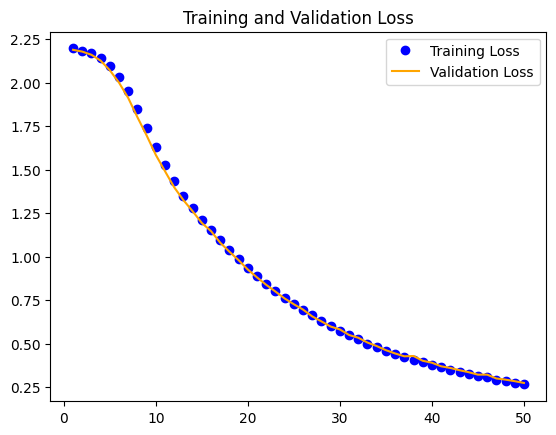

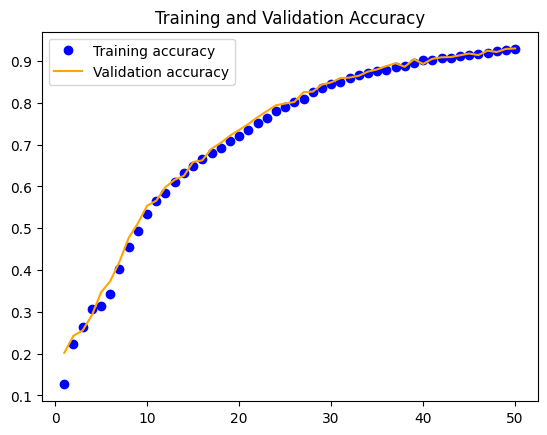

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plot_loss(range(1, len(loss) + 1), loss, val_loss)
plot_accuracy(range(1, len(loss) + 1), acc, val_acc)


In [ ]:
score = model.evaluate(x_test,y_test, verbose=0)
print(score)
print('\nKeras CNN - accuracy:', score[1], '\n')

y_pred = model.predict(x_test, verbose = 1)
#print('\n', sklearn.metrics.classification_report(np.where(y_test > 0)[1], np.argmax(y_pred, axis=1), target_names=list(labels.values())), sep='')
Y_pred_classes = np.argmax(y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)
report = metrics.classification_report(Y_true, Y_pred_classes, target_names=class_labels)
print(report)

[0.2744573652744293, 0.9299262166023254]

Keras CNN - accuracy: 0.9299262166023254 

60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step
              precision    recall  f1-score   support

           A       0.95      0.94      0.95       213
        Asal       0.95      0.94      0.94       188
           B       0.91      0.93      0.92       206
           C       0.89      0.91      0.90       216
           D       0.95      0.93      0.94       215
           E       0.97      0.96      0.96       224
        Halo       0.89      0.88      0.89       198
           I       0.90      0.87      0.89       195
Terima kasih       0.95      0.99      0.97       243

    accuracy                           0.93      1898
   macro avg       0.93      0.93      0.93      1898
weighted avg       0.93      0.93      0.93      1898



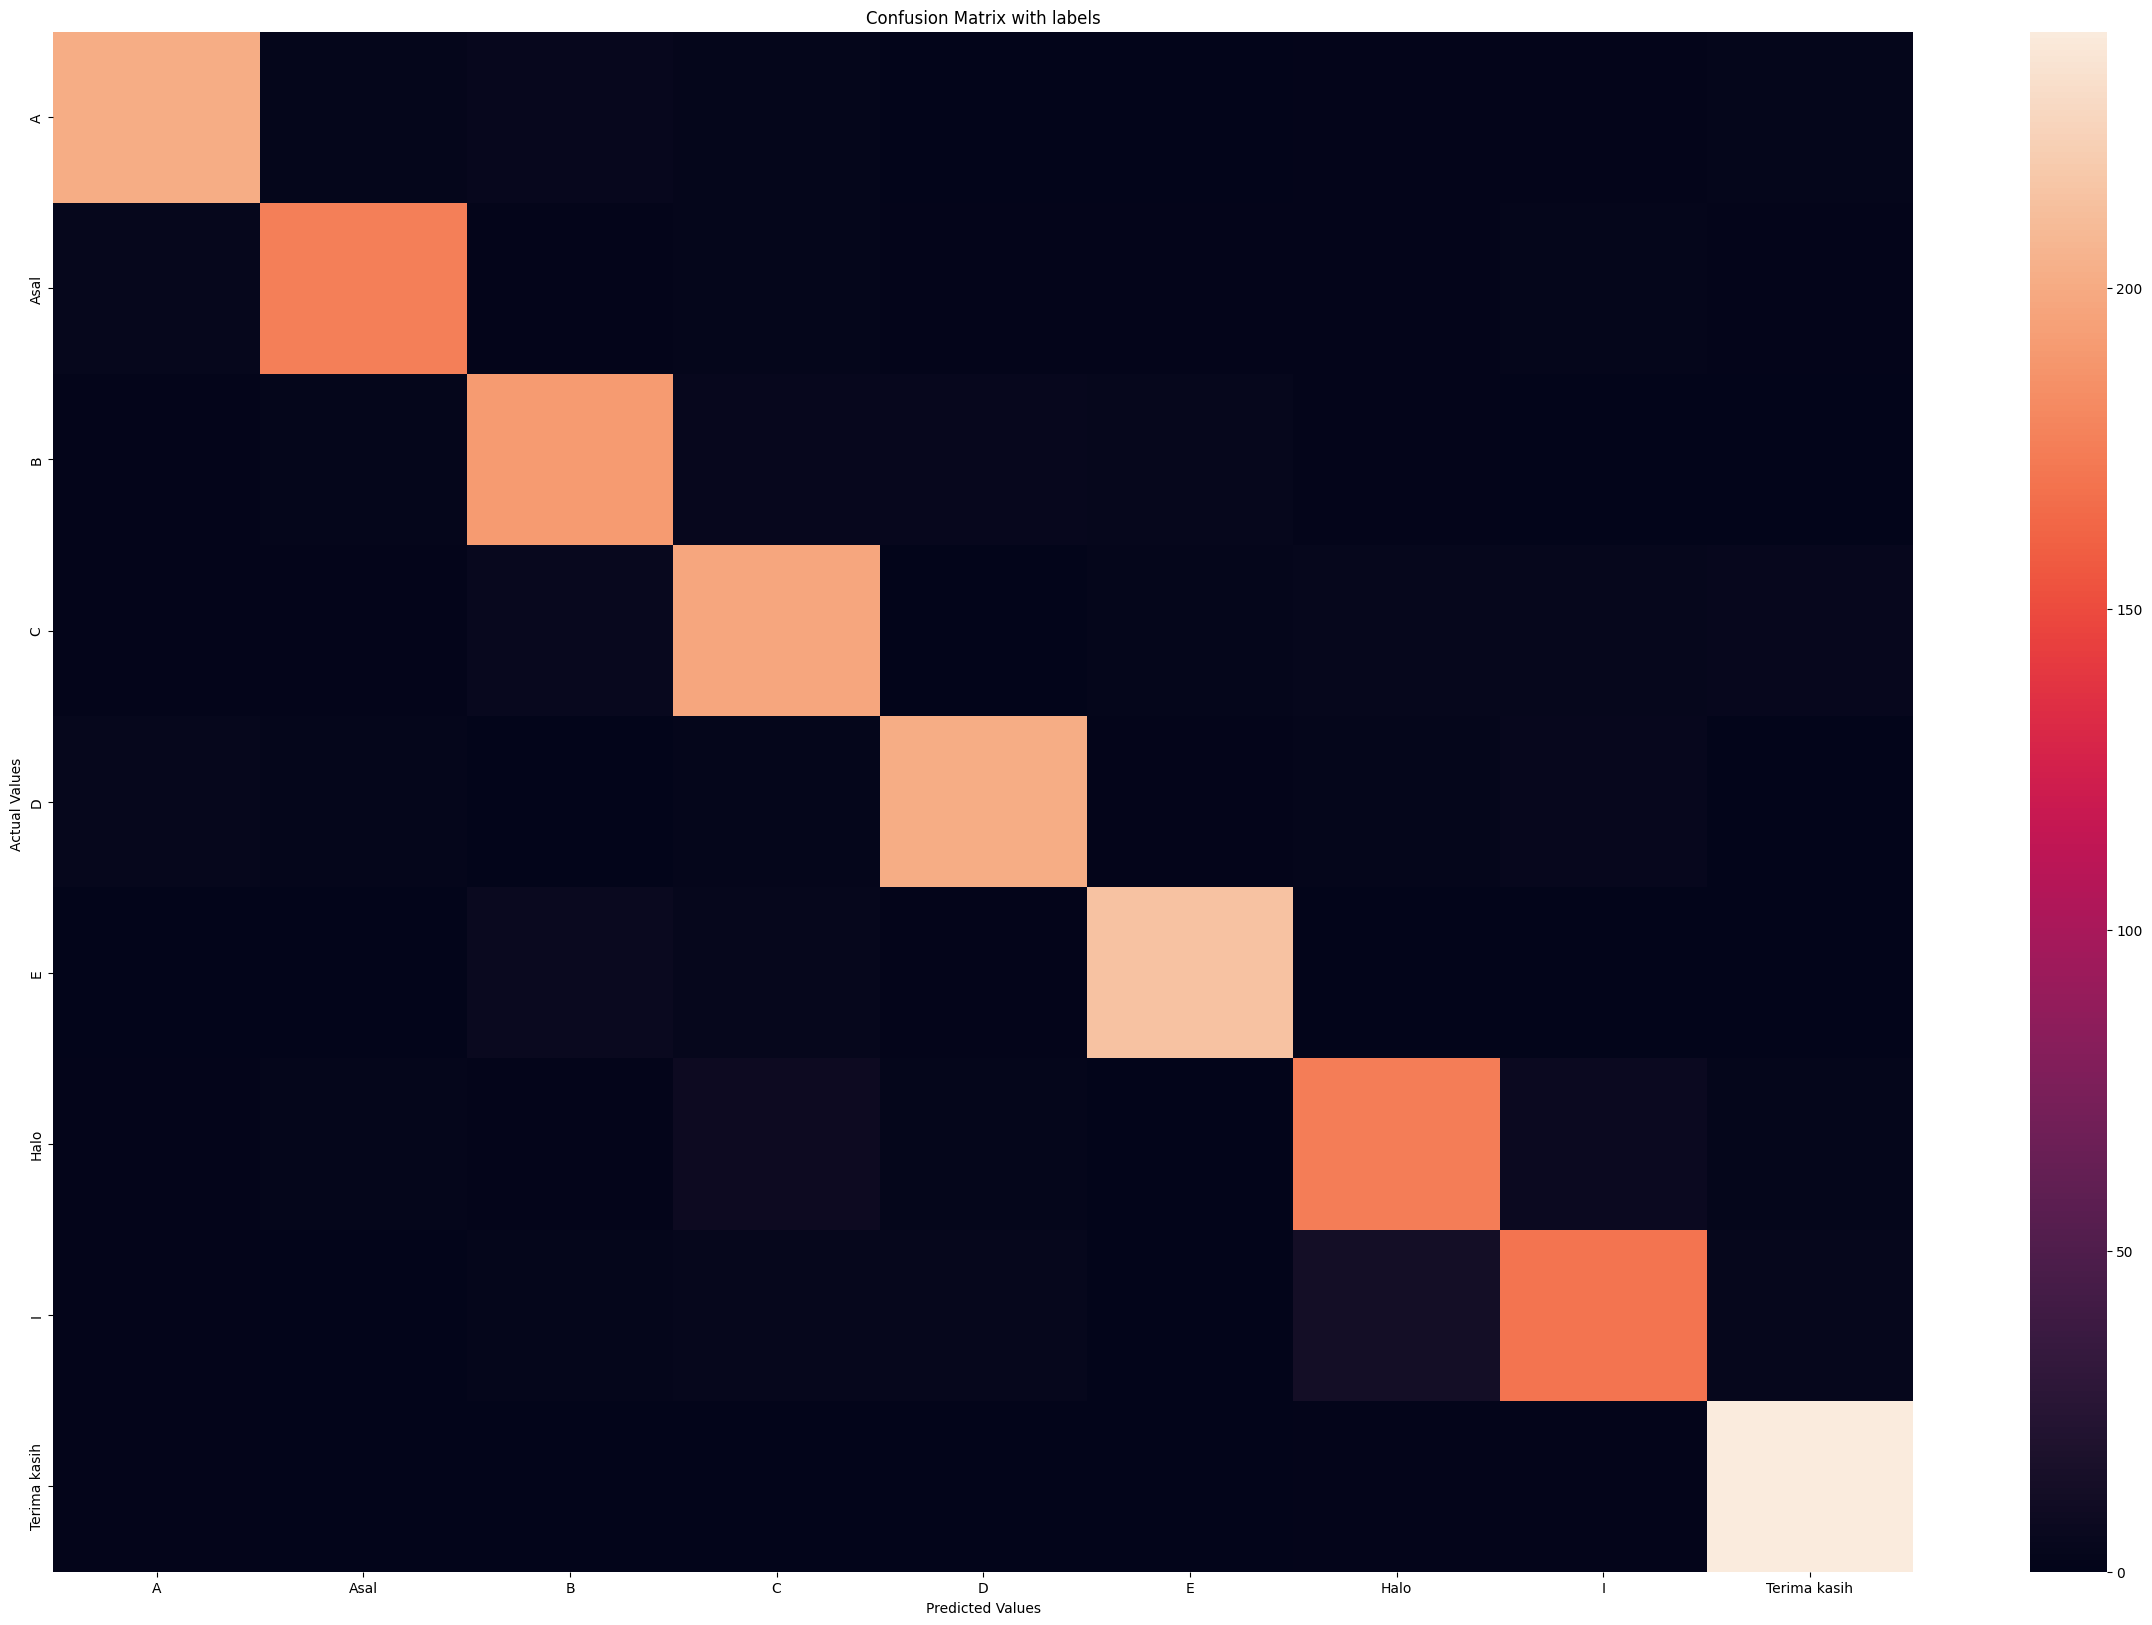

In [ ]:
plt.figure(figsize=(30, 20))

ax = sns.heatmap(metrics.confusion_matrix(Y_true,Y_pred_classes))
ax.set_title('Confusion Matrix with labels', fontsize=40)
ax.set_xlabel('Predicted Values', fontsize=35)
ax.set_ylabel('Actual Values ', fontsize=35)
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(class_labels, fontsize=25)
ax.yaxis.set_ticklabels(class_labels, fontsize=25)

plt.show()

In [ ]:
confusion = metrics.confusion_matrix(Y_true,Y_pred_classes)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[201   2   4   2   0   0   1   1   2]
 [  3 176   1   2   1   1   1   2   1]
 [  1   2 191   4   4   3   1   0   0]
 [  1   1   5 197   0   2   3   3   4]
 [  3   2   0   2 201   1   2   4   0]
 [  0   0   6   3   1 214   0   0   0]
 [  1   2   1   8   2   0 175   7   2]
 [  1   0   2   3   3   0  13 170   3]
 [  1   0   0   0   0   0   1   1 240]]


In [ ]:
model.save('model_handtalk.h5')